In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from scipy import stats

# Stage - 1
## Exploratory Data Analysis (EDA)

# Visualising the Data

In [2]:
data = pd.read_csv("Data_3.csv")

print(data.head(5))

   HomePage  HomePage_Duration  LandingPage  LandingPage_Duration  \
0       0.0                0.0          0.0                   0.0   
1       0.0                0.0          0.0                   0.0   
2       0.0                0.0          0.0                   0.0   
3       0.0                0.0          0.0                   0.0   
4       1.0                0.0          0.0                   0.0   

   ProductDescriptionPage  ProductDescriptionPage_Duration  \
0                     1.0                         0.000000   
1                     2.0                         2.666667   
2                    10.0                       627.500000   
3                     1.0                         0.000000   
4                     0.0                         0.000000   

   GoogleMetric:Bounce Rates  GoogleMetric:Exit Rates  \
0                       0.20                     0.20   
1                       0.05                     0.14   
2                       0.02             

In [3]:
numeric_columns = data.select_dtypes(include='number')

# Print the names of the numeric columns
print("Numeric columns:")
print(numeric_columns.columns)

Numeric columns:
Index(['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
       'ProductDescriptionPage', 'ProductDescriptionPage_Duration',
       'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates',
       'GoogleMetric:Page Values', 'SeasonalPurchase', 'OS', 'SearchEngine',
       'Zone', 'Type of Traffic', 'WeekendPurchase'],
      dtype='object')


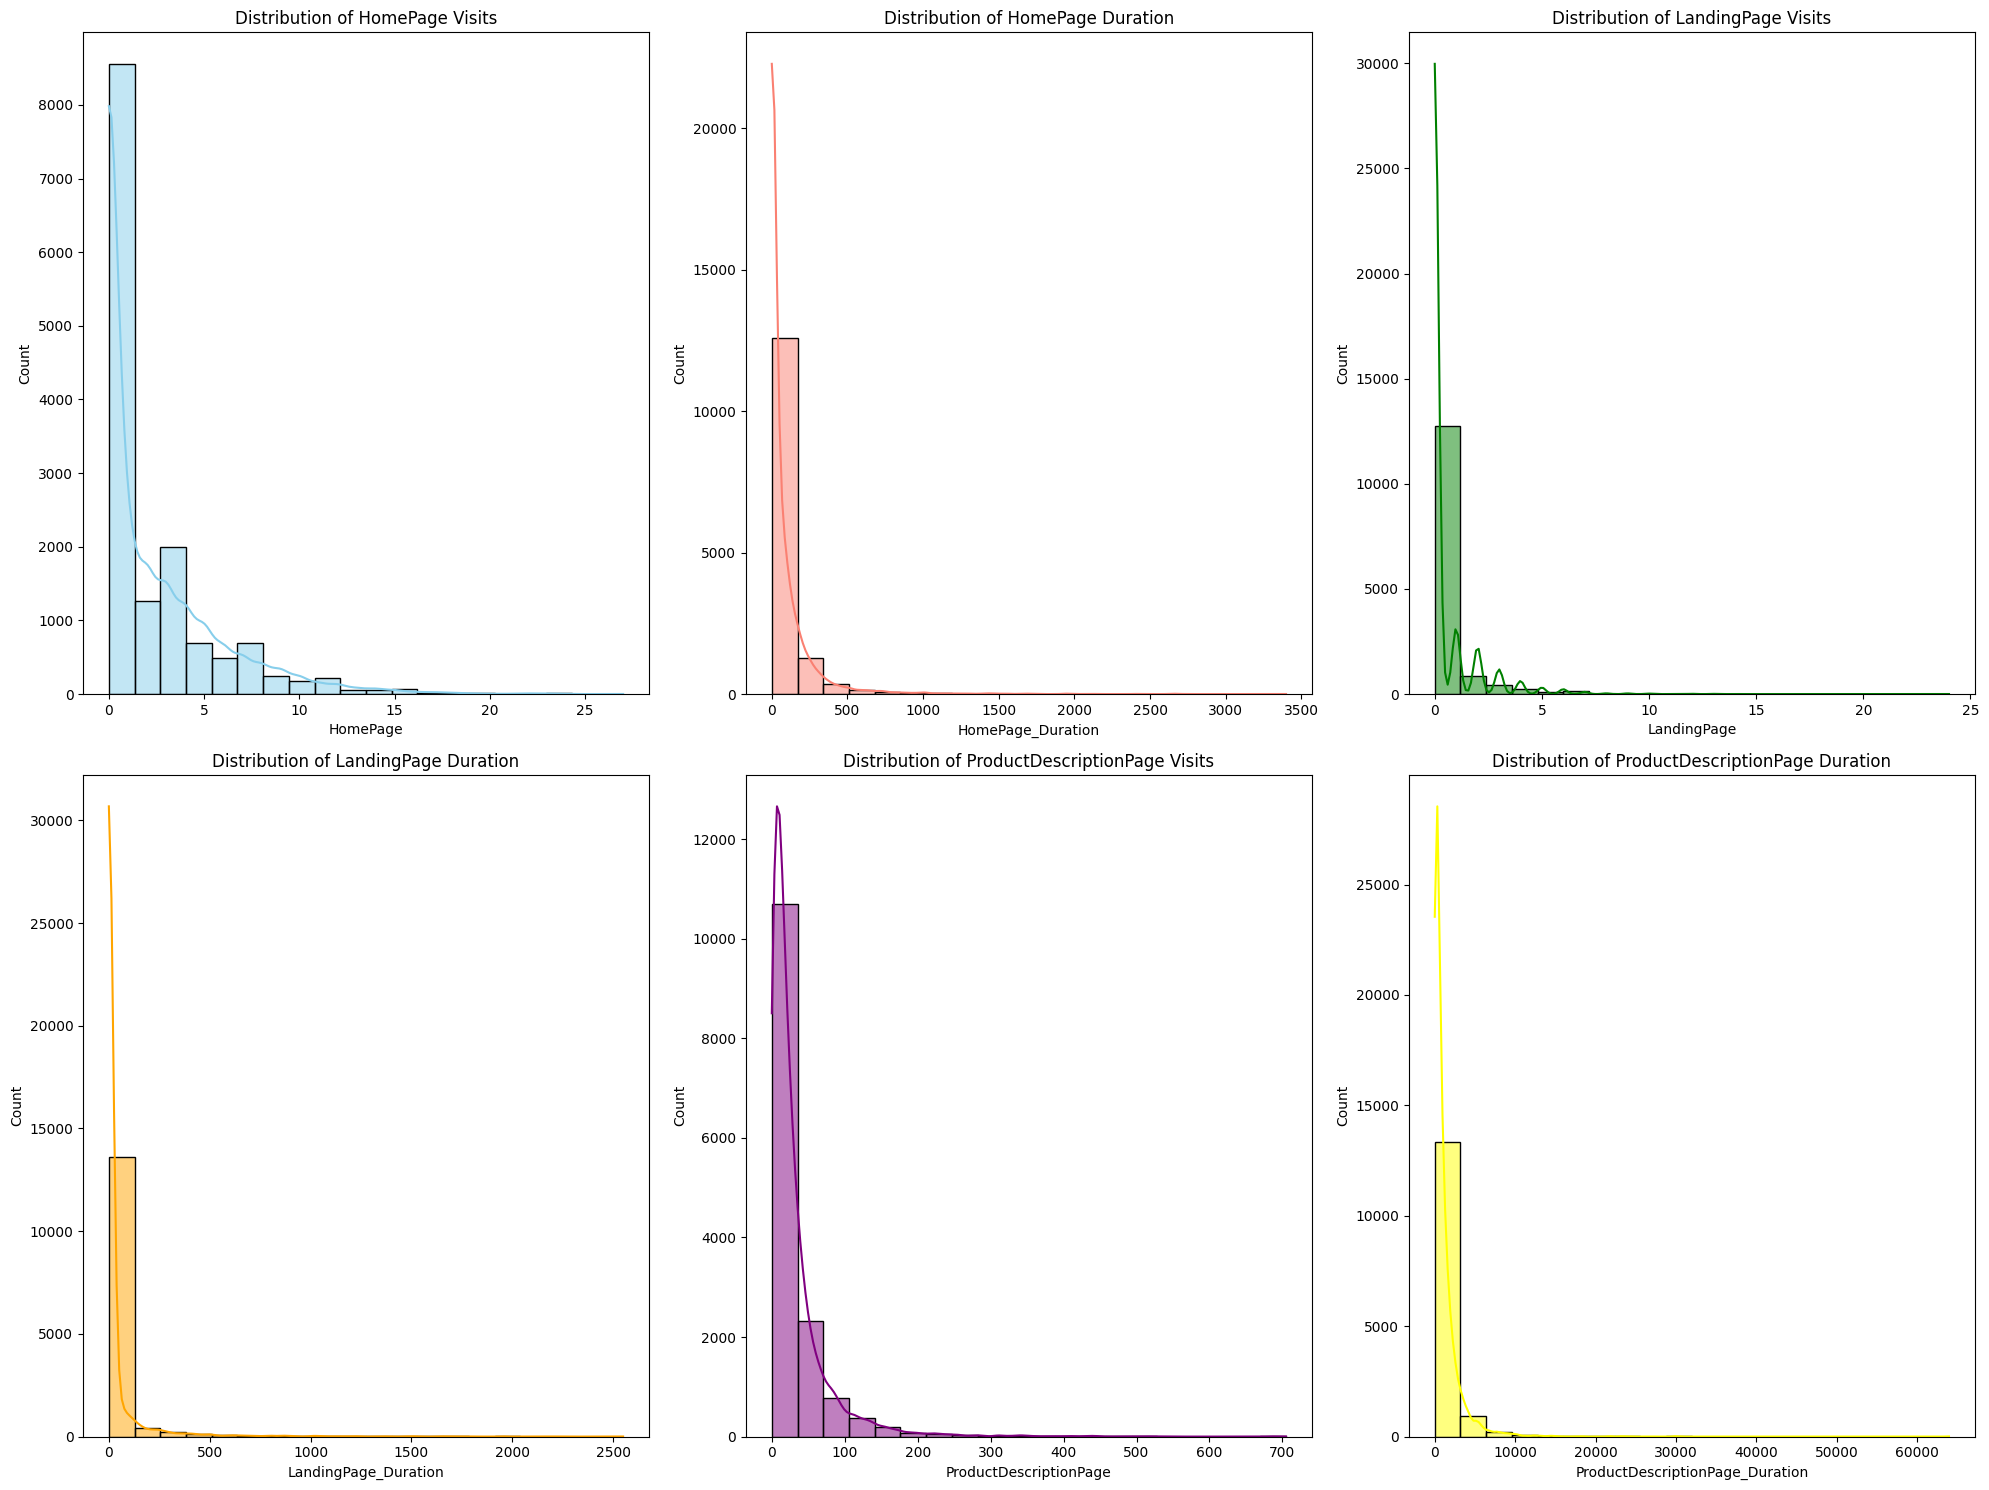

In [4]:
# Create histograms for numerical variables
plt.figure(figsize=(20, 15))

# Histogram for HomePage
plt.subplot(2, 3, 1)
sns.histplot(data['HomePage'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of HomePage Visits')

# Histogram for HomePage_Duration
plt.subplot(2, 3, 2)
sns.histplot(data['HomePage_Duration'], bins=20, kde=True, color='salmon')
plt.title('Distribution of HomePage Duration')

# Histogram for LandingPage
plt.subplot(2, 3, 3)
sns.histplot(data['LandingPage'], bins=20, kde=True, color='green')
plt.title('Distribution of LandingPage Visits')

# Histogram for LandingPage_Duration
plt.subplot(2, 3, 4)
sns.histplot(data['LandingPage_Duration'], bins=20, kde=True, color='orange')
plt.title('Distribution of LandingPage Duration')

# Histogram for ProductDescriptionPage
plt.subplot(2, 3, 5)
sns.histplot(data['ProductDescriptionPage'], bins=20, kde=True, color='purple')
plt.title('Distribution of ProductDescriptionPage Visits')

# Histogram for ProductDescriptionPage_Duration
plt.subplot(2, 3, 6)
sns.histplot(data['ProductDescriptionPage_Duration'], bins=20, kde=True, color='yellow')
plt.title('Distribution of ProductDescriptionPage Duration')

plt.tight_layout()
plt.show()

In [5]:
categorical_columns = data.select_dtypes(include='object').columns

categorical_columns

Index(['Month_SeasonalPurchase', 'CustomerType', 'Gender', 'Cookies Setting',
       'Education', 'Marital Status'],
      dtype='object')

In [6]:
print(data.dtypes)

HomePage                           float64
HomePage_Duration                  float64
LandingPage                        float64
LandingPage_Duration               float64
ProductDescriptionPage             float64
ProductDescriptionPage_Duration    float64
GoogleMetric:Bounce Rates          float64
GoogleMetric:Exit Rates            float64
GoogleMetric:Page Values           float64
SeasonalPurchase                   float64
Month_SeasonalPurchase              object
OS                                 float64
SearchEngine                       float64
Zone                               float64
Type of Traffic                    float64
CustomerType                        object
Gender                              object
Cookies Setting                     object
Education                           object
Marital Status                      object
WeekendPurchase                    float64
Made_Purchase                         bool
dtype: object


In [7]:
categorical_cols = ['Month_SeasonalPurchase', 'CustomerType', 'Gender', 'Cookies Setting', 'Education', 'Marital Status', 'OS', 'SearchEngine', 'Zone', 'Type of Traffic']
data[categorical_cols] = data[categorical_cols].astype('category')

In [8]:
print(data.dtypes)

HomePage                            float64
HomePage_Duration                   float64
LandingPage                         float64
LandingPage_Duration                float64
ProductDescriptionPage              float64
ProductDescriptionPage_Duration     float64
GoogleMetric:Bounce Rates           float64
GoogleMetric:Exit Rates             float64
GoogleMetric:Page Values            float64
SeasonalPurchase                    float64
Month_SeasonalPurchase             category
OS                                 category
SearchEngine                       category
Zone                               category
Type of Traffic                    category
CustomerType                       category
Gender                             category
Cookies Setting                    category
Education                          category
Marital Status                     category
WeekendPurchase                     float64
Made_Purchase                          bool
dtype: object


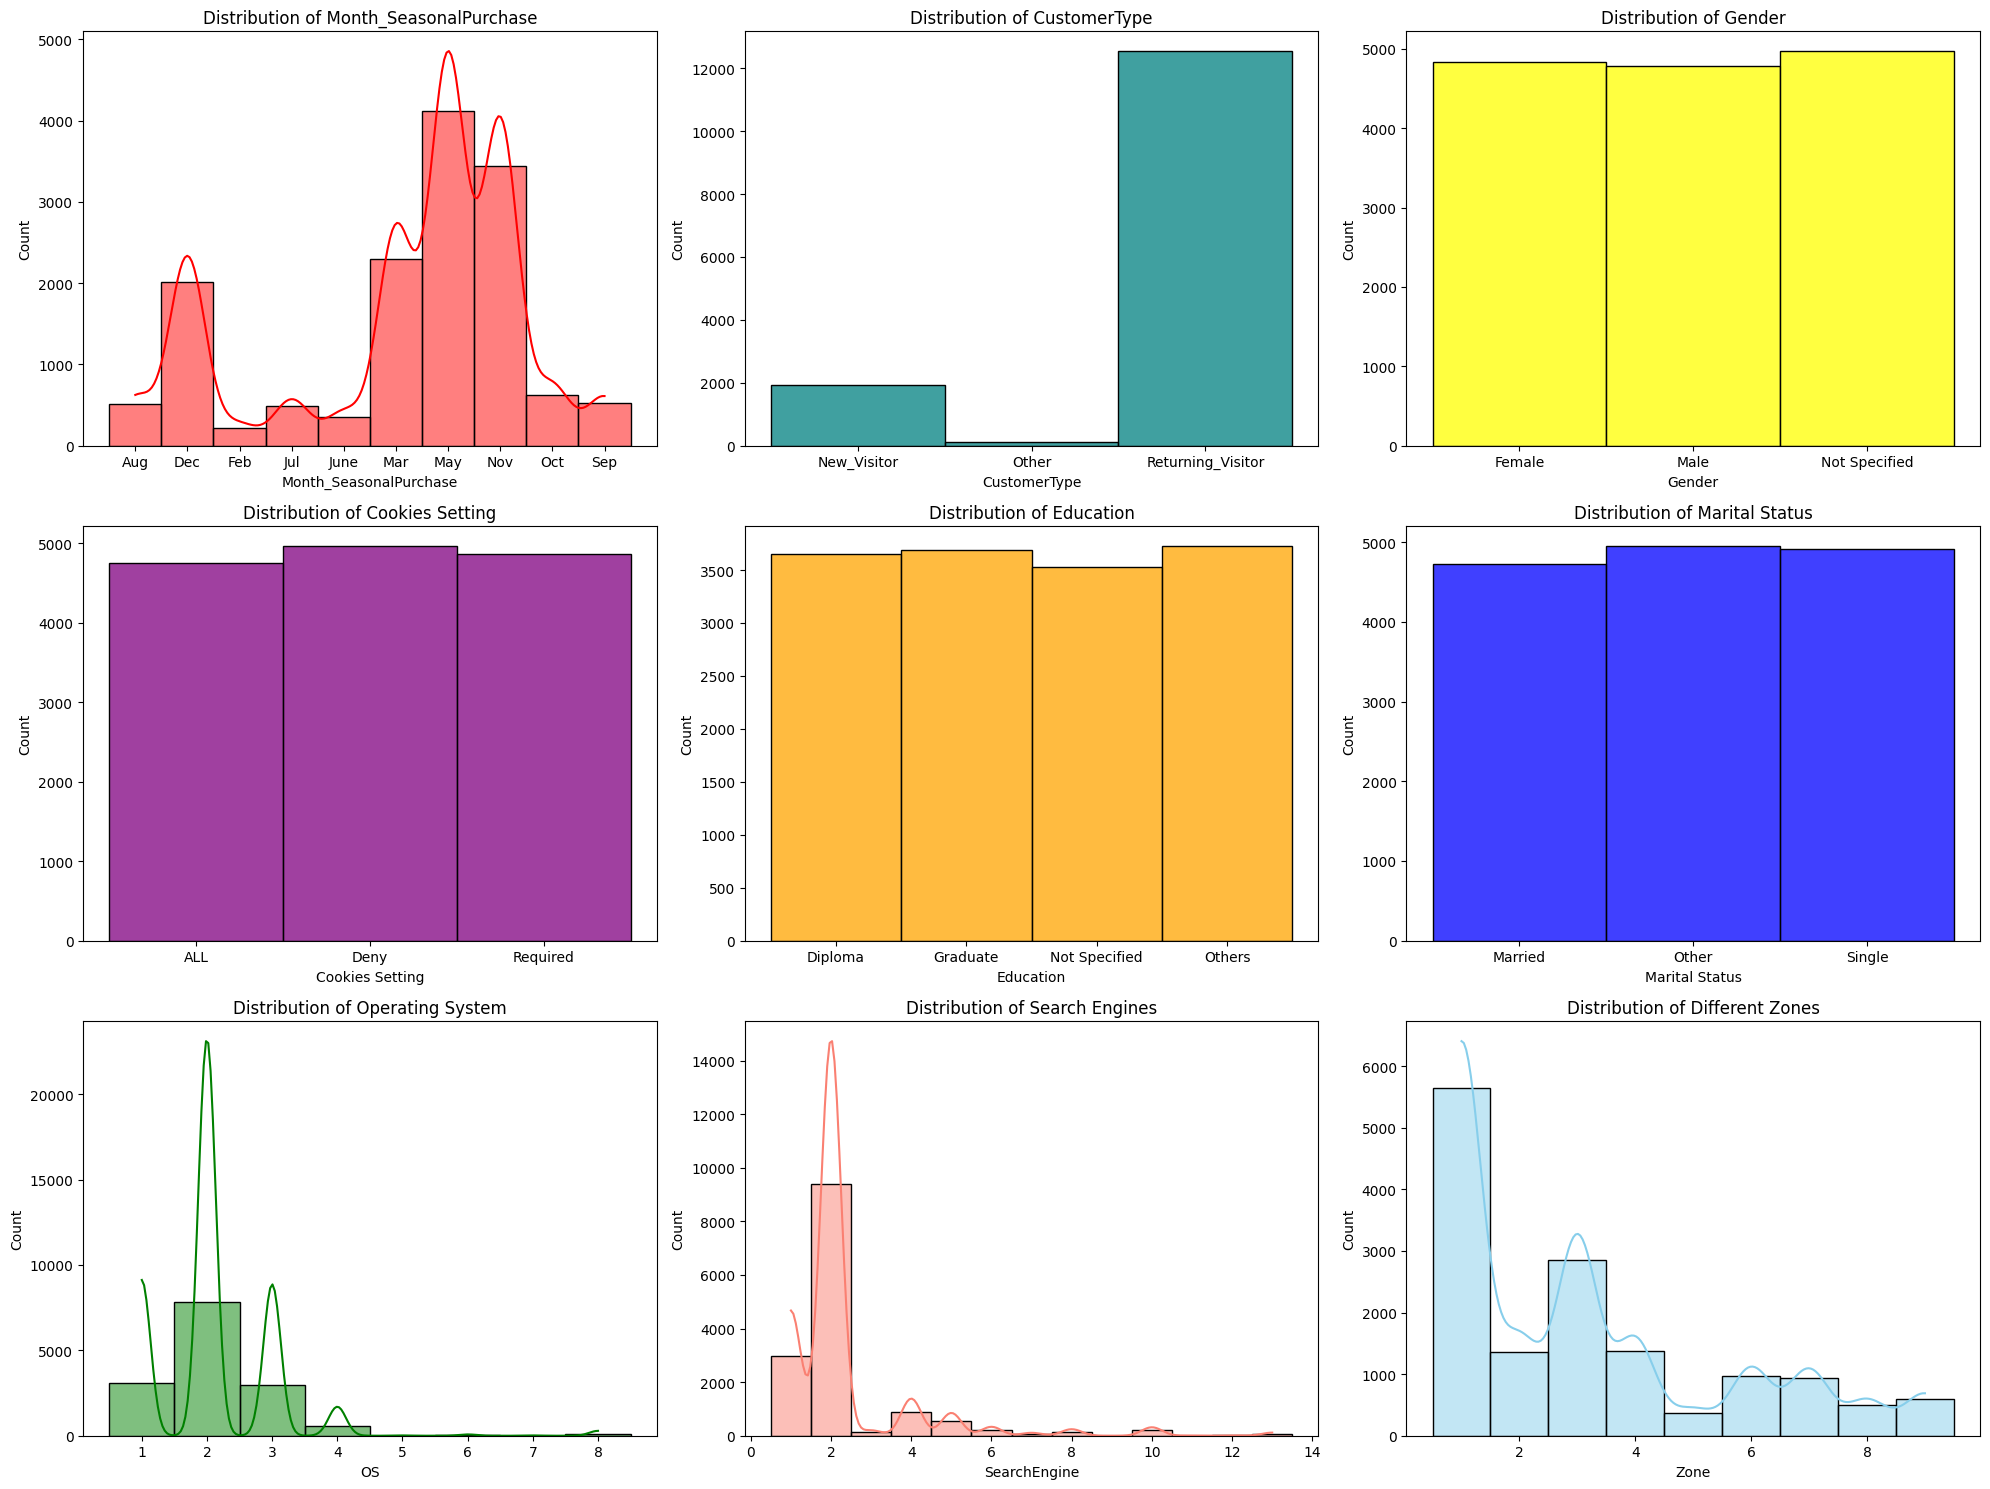

In [9]:
plt.figure(figsize=(20, 15))

# Plot histograms for categorical variables
plt.subplot(3, 3, 1)
sns.histplot(data=data, x='Month_SeasonalPurchase', kde=True, color='red')
plt.title('Distribution of Month_SeasonalPurchase')

plt.subplot(3, 3, 2)
sns.histplot(data=data, x='CustomerType', color='teal')
plt.title('Distribution of CustomerType')

plt.subplot(3, 3, 3)
sns.histplot(data=data, x='Gender', color='yellow')
plt.title('Distribution of Gender')

plt.subplot(3, 3, 4)
sns.histplot(data=data, x='Cookies Setting',  color='purple')
plt.title('Distribution of Cookies Setting')

plt.subplot(3, 3, 5)
sns.histplot(data=data, x='Education',  color='orange')
plt.title('Distribution of Education')

plt.subplot(3, 3, 6)
sns.histplot(data=data, x='Marital Status',  color='blue')
plt.title('Distribution of Marital Status')

plt.subplot(3, 3, 7)
sns.histplot(data=data, x='OS', kde=True, color='green')
plt.title('Distribution of Operating System')

plt.subplot(3, 3, 8)
sns.histplot(data=data, x='SearchEngine', kde=True, color='salmon')
plt.title('Distribution of Search Engines')

plt.subplot(3, 3, 9)
sns.histplot(data=data, x='Zone', kde=True, color='skyblue')
plt.title('Distribution of Different Zones')

plt.tight_layout()
plt.show()

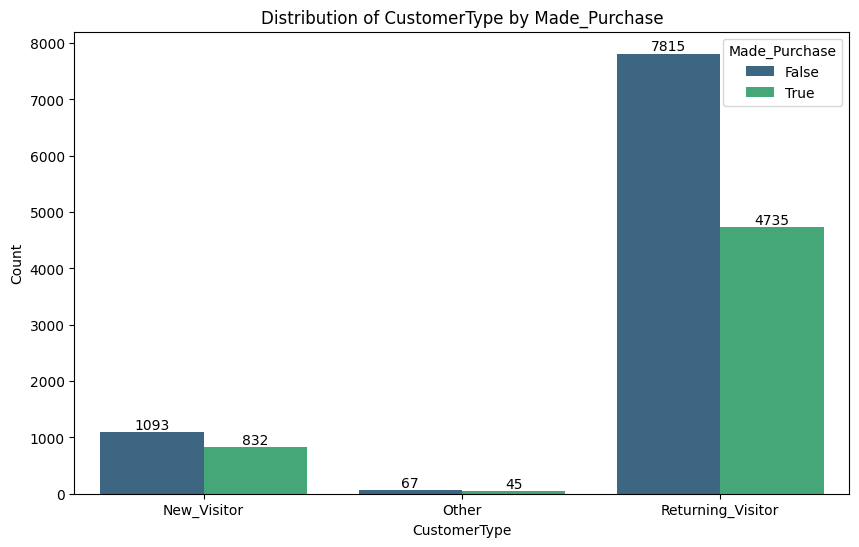

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='CustomerType', hue='Made_Purchase', palette='viridis')

for p in plt.gca().patches:
    plt.gca().annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.title('Distribution of CustomerType by Made_Purchase')
plt.xlabel('CustomerType')
plt.ylabel('Count')
plt.legend(title='Made_Purchase', loc='upper right')
plt.show()

### Observations:
####    1) Returning visitors (RVs) constitute the majority of the customer base, followed by new visitors (NVs) and other categories.
####    2) Among RVs, a significant portion made a purchase, indicating a higher conversion rate compared to NVs.
-----------------

### Insights:
####    1) RVs have a higher likelihood of making a purchase compared to NVs, suggesting that they are a valuable segment with potential for repeat purchases.
####    2) NVs require targeted strategies and efforts to improve conversion rates and transform them into repeat customers.
-----------------
### Recommendations:
####    1) Retention Strategies for RVs:
#####       *) Focus on retaining and nurturing RVs by offering personalized offers, loyalty programs, and incentives to encourage repeat purchases.
#####       *) Implement strategies to enhance the overall user experience for RVs and provide incentives for continued engagement.

####    2) Engagement Strategies for NVs:
#####       *) Improve the user experience for NVs by optimizing landing pages, providing clear calls-to-action, and offering incentives to encourage initial purchases.
#####       *) Implement targeted marketing campaigns to engage NVs and guide them through the customer journey to increase conversion rates.

####    3) Overall Strategy:
#####       *) Develop a holistic approach that combines retention strategies for RVs and targeted engagement strategies for NVs to maximize customer acquisition and retention.


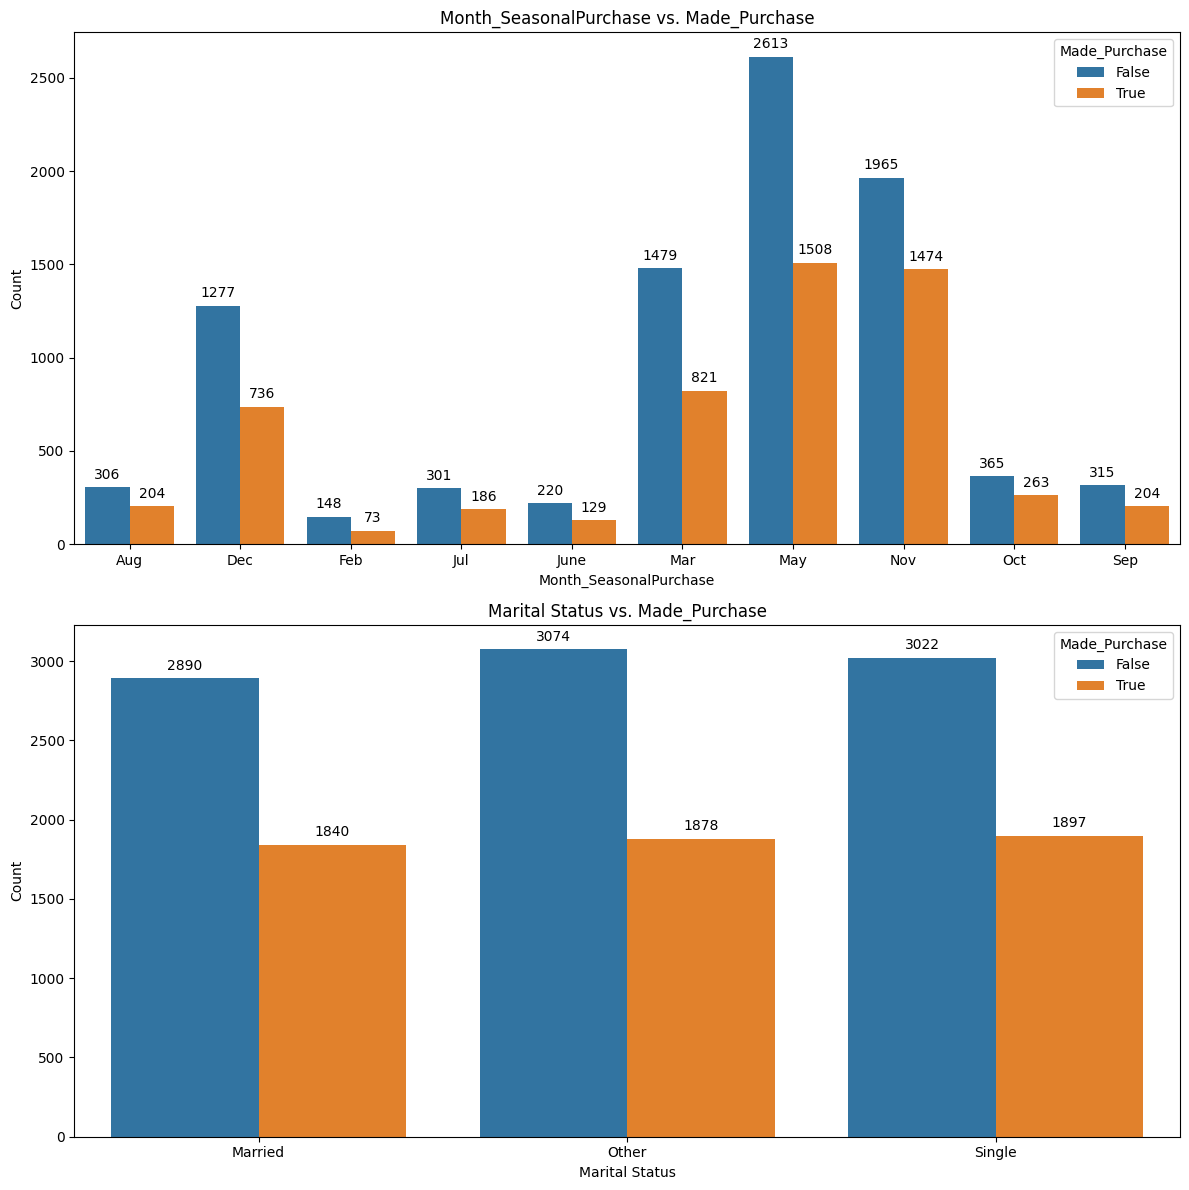

In [11]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

# Function to add count values above each bar
def add_count_values(plot):
    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.0f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

# Stacked bar chart for Month_SeasonalPurchase vs. Made_Purchase
month_purchase_plot = sns.countplot(data=data, x='Month_SeasonalPurchase', hue='Made_Purchase', ax=axes[0])
add_count_values(month_purchase_plot)
axes[0].set_title('Month_SeasonalPurchase vs. Made_Purchase')
axes[0].set_xlabel('Month_SeasonalPurchase')
axes[0].set_ylabel('Count')

# Stacked bar chart for Marital Status vs. Made_Purchase
marital_purchase_plot = sns.countplot(data=data, x='Marital Status', hue='Made_Purchase', ax=axes[1])
add_count_values(marital_purchase_plot)
axes[1].set_title('Marital Status vs. Made_Purchase')
axes[1].set_xlabel('Marital Status')
axes[1].set_ylabel('Count')

# Show the plots
plt.tight_layout()
plt.show()

### Distribution of Month_SeasonalPurchase vs. Made Purchase:

#### 1) May followed by Nov & Mar exhibits the highest count of made purchases (True), indicating it's a strong month for conversions.
#### 2) February has the lowest count of made purchases, suggesting it's a challenging month for conversions.
#### 3) Other months fall somewhere between May and February in terms of conversion counts.

# IDA (Initial Data Analysis)

## Handling Missing Values

In [12]:
# Identify missing values in each column
missing_values = data.isna().sum()

# Display the count of missing values for each column
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
HomePage                           153
HomePage_Duration                  150
LandingPage                        153
LandingPage_Duration               135
ProductDescriptionPage             123
ProductDescriptionPage_Duration    167
GoogleMetric:Bounce Rates          151
GoogleMetric:Exit Rates            129
GoogleMetric:Page Values           132
SeasonalPurchase                   150
Month_SeasonalPurchase             144
OS                                 134
SearchEngine                       122
Zone                               117
Type of Traffic                    143
CustomerType                       144
Gender                             145
Cookies Setting                    144
Education                          136
Marital Status                     130
WeekendPurchase                    121
Made_Purchase                        0
dtype: int64


### before deciding which method to use for dealing the missing values (MV's) it is better to go with listwise deletion where either all the columns are missing or rows with most column values are missing. (stage-1 of dealing with missing values)

In [13]:
mask = data.isnull().sum(axis=1) >= len(data.columns) - 3  # Check for all missing or 3+ missing values

# Filter the DataFrame using the mask
filtered_df = data[~mask]

print(data.isna().sum())
print('---------------------')
print(filtered_df.isna().sum())

HomePage                           153
HomePage_Duration                  150
LandingPage                        153
LandingPage_Duration               135
ProductDescriptionPage             123
ProductDescriptionPage_Duration    167
GoogleMetric:Bounce Rates          151
GoogleMetric:Exit Rates            129
GoogleMetric:Page Values           132
SeasonalPurchase                   150
Month_SeasonalPurchase             144
OS                                 134
SearchEngine                       122
Zone                               117
Type of Traffic                    143
CustomerType                       144
Gender                             145
Cookies Setting                    144
Education                          136
Marital Status                     130
WeekendPurchase                    121
Made_Purchase                        0
dtype: int64
---------------------
HomePage                           153
HomePage_Duration                  150
LandingPage                  

### as stage-1 deletion doesn't bring any good to the problem let's explore the distribution of MV's 

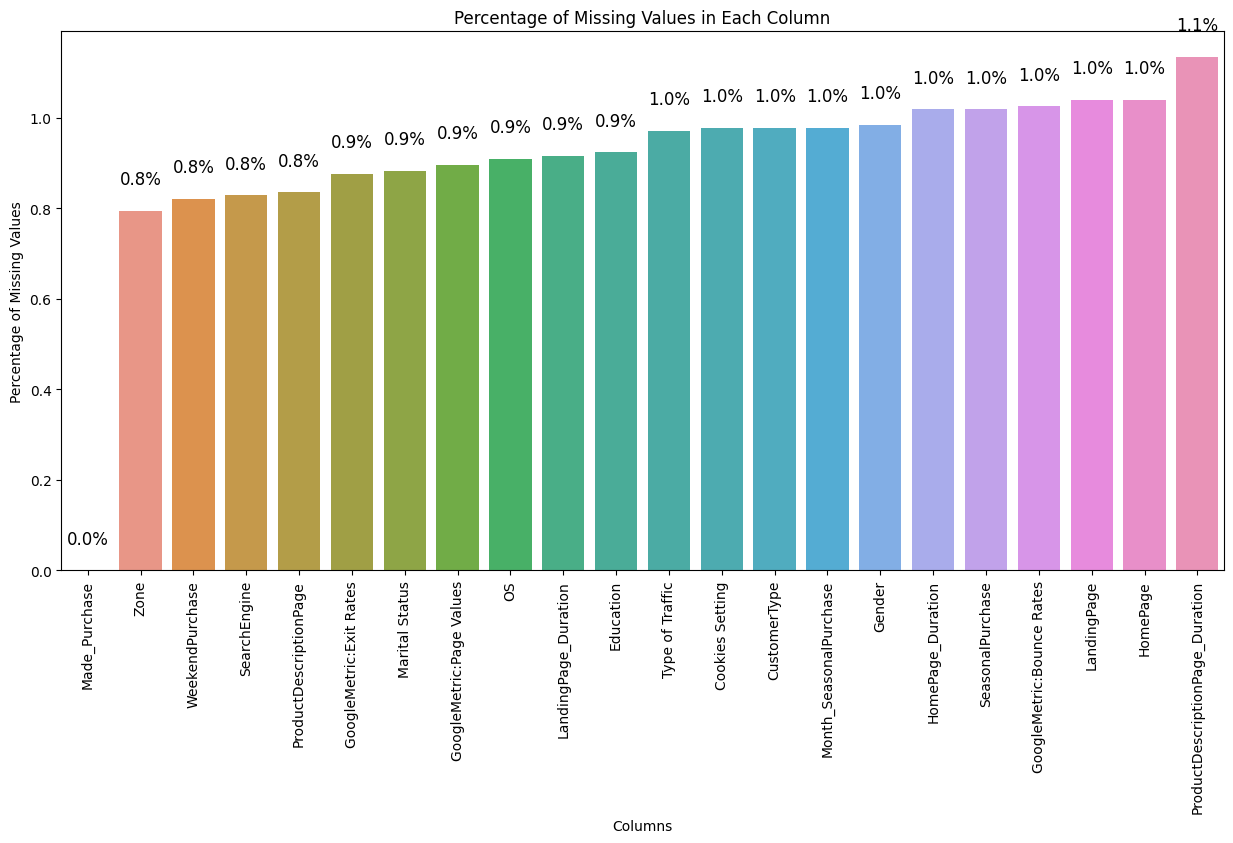

In [14]:
missing_percentage = (data.isnull().sum() / len(data)) * 100
missing_percentage = missing_percentage.sort_values(ascending=True)

# Create a bar plot to visualize missing values
plt.figure(figsize=(15, 7))
sns.barplot(x=missing_percentage.index, y=missing_percentage)
for i, v in enumerate(missing_percentage):
    plt.text(i, v + 0.05, f"{v:.1f}%", ha='center', va='bottom', fontsize=12)

plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Percentage of Missing Values in Each Column')
plt.xticks(rotation=90)
plt.show()

### For columns with a very low percentage of missing values, simple imputation methods like mean, median, or mode can be sufficient and computationally efficient. Regression imputation, on the other hand, is more complex and generally used when there is a strong correlation between the missing variable and other variables in the dataset.

### After observing the low percentage of missing values in data, simple imputation methods like mean, median, or mode are appropriate choices. These methods provide a quick and effective way to handle missing data without introducing significant complexity or computational overhead.

In [15]:
numerical_columns = data.select_dtypes(include=['float64', 'int64'])  # Select numerical columns

# Calculate skewness for each numerical column
skewness = numerical_columns.skew()

# Display skewness for each column
print("Skewness for numerical columns:")
print(skewness.sort_values(ascending=True))

Skewness for numerical columns:
WeekendPurchase                    1.255688
HomePage                           2.033559
GoogleMetric:Exit Rates            2.067722
GoogleMetric:Bounce Rates          2.830608
SeasonalPurchase                   3.217069
LandingPage                        4.145429
ProductDescriptionPage             4.459032
HomePage_Duration                  5.922487
GoogleMetric:Page Values           7.588103
LandingPage_Duration               7.997997
ProductDescriptionPage_Duration    8.580754
dtype: float64


### 1) Highly skewed data can affect the performance of machine learning models, so in-order to address that one can use log tranformation to reduce skewness, Additionally, for columns with less severe skewness, simple imputation methods like mean, median, or mode can be effective

### 2) However, it's essential to handle zero or negative values appropriately before applying log transformation, as it's not defined for those values.

### 3) To handle zero or negative values we can use "Shift and scale" method in which we can shift the distribution by adding a constant value and then scale it using a factor to ensure all values are positive and spread across a reasonable range.

### so one can do the following....
### Shift the distribution: Add a constant value to each element in the column to ensure all values are positive.
### Scale the distribution: Scale the shifted values using a factor to spread them across a reasonable range.

In [16]:
# Check for zero or negative values in the specified columns
skewed_columns = ['LandingPage', 'ProductDescriptionPage', 'HomePage_Duration', 
                  'GoogleMetric:Page Values', 'LandingPage_Duration', 'ProductDescriptionPage_Duration']

# Check for zero or negative values
zero_or_negative_values = data[skewed_columns].apply(lambda x: (x <= 0).sum())

# Display columns with zero or negative values
print(zero_or_negative_values)

LandingPage                        11525
ProductDescriptionPage                46
HomePage_Duration                   7130
GoogleMetric:Page Values           11787
LandingPage_Duration               11804
ProductDescriptionPage_Duration      957
dtype: int64


### seems like it's better to use regression imputation for highly skewed data after getting to know that there are a significant number of zero or negative values in several columns

### so before moving on lets go with simple imputation for less skewed data followed by regression imputation on highly skewed data.

### Simple Imputation for less +ve skewed columns and for categorical variables

In [17]:
# Impute missing values with median for positively skewed columns
skewed_columns = ['WeekendPurchase', 'HomePage', 'GoogleMetric:Exit Rates', 'GoogleMetric:Bounce Rates', 'SeasonalPurchase']

for column in skewed_columns:
    median_value = data[column].median()
    data[column].fillna(median_value, inplace=True)

categorical_columns = ['Month_SeasonalPurchase','OS','SearchEngine','Zone',
                       'Type of Traffic','CustomerType', 'Gender', 'Cookies Setting',
                        'Education', 'Marital Status']

# Impute missing values with the mode (most frequent value) for each column
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

### Regression Imputation for highly skewed data

#### 1) Using "pd.interpolate()" is a valid method for imputing missing values, especially for numerical data. It provides several interpolation methods such as linear, polynomial, and spline interpolation

#### 2) On the other hand, "IterativeImputer" from scikit-learn is a more sophisticated method that utilizes regression models to predict missing values based on other features in the dataset. It's particularly useful when the relationship between variables is complex or non-linear

#### 3) In the context of our dataset and the highly skewed numerical columns, both methods can be effective. However, considering the complexity of the relationships between variables in real-world data, IterativeImputer may provide more accurate imputations

In [18]:
skewed_columns = ['LandingPage', 'ProductDescriptionPage', 'HomePage_Duration', 
                  'GoogleMetric:Page Values', 'LandingPage_Duration', 'ProductDescriptionPage_Duration']

imputer = IterativeImputer(max_iter=10, random_state=0)

# Fit the imputer to the data and transform the dataset
data_skewed_imputed = imputer.fit_transform(data[skewed_columns])

# Convert the transformed array back to a DataFrame
data_skewed_imputed = pd.DataFrame(data_skewed_imputed, columns=skewed_columns)

# Update the original dataframe with imputed values
data[skewed_columns] = data_skewed_imputed

In [19]:
print(data.isna().sum())

HomePage                           0
HomePage_Duration                  0
LandingPage                        0
LandingPage_Duration               0
ProductDescriptionPage             0
ProductDescriptionPage_Duration    0
GoogleMetric:Bounce Rates          0
GoogleMetric:Exit Rates            0
GoogleMetric:Page Values           0
SeasonalPurchase                   0
Month_SeasonalPurchase             0
OS                                 0
SearchEngine                       0
Zone                               0
Type of Traffic                    0
CustomerType                       0
Gender                             0
Cookies Setting                    0
Education                          0
Marital Status                     0
WeekendPurchase                    0
Made_Purchase                      0
dtype: int64


## Outlier Detection & Handling

### visual inspection:- begining by visually inspecting the distribution of each numerical variable or feature we can decide which methods to choose between parametric and non parametric methods.

### And to determine whether the distribution of a numerical variable is approximately normal or not, one can use visual methods such as histograms, Q-Q plots (quantile-quantile plots), and statistical tests such as the Shapiro-Wilk test or the Kolmogorov-Smirnov test for normality

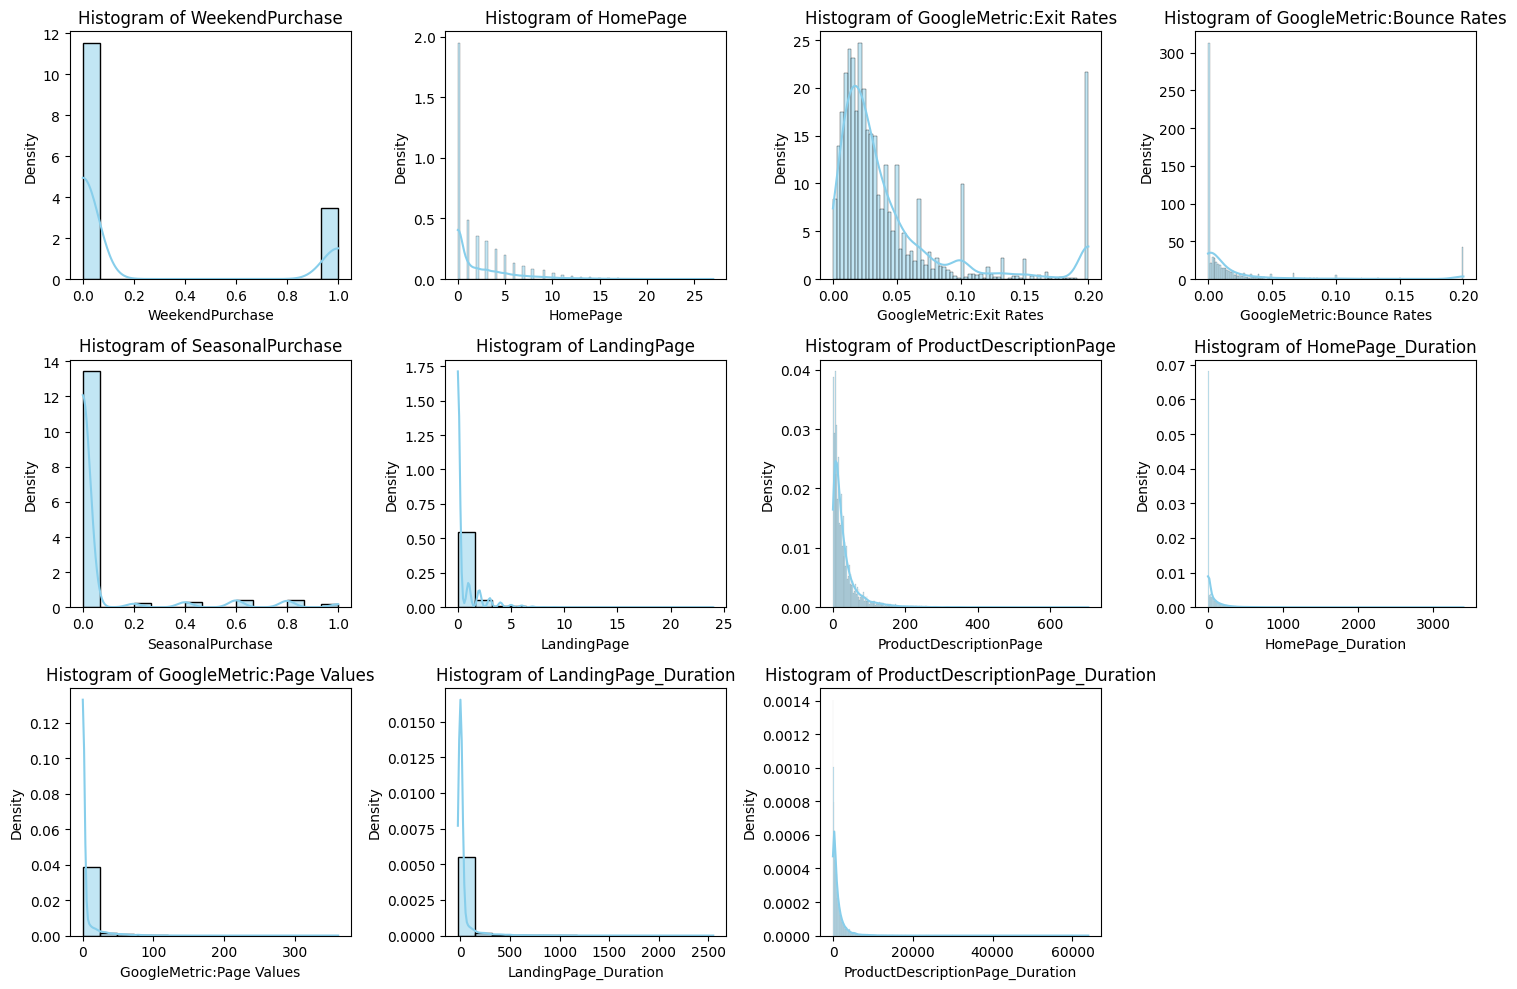

In [20]:
# List of numerical variables
numerical_variables = ['WeekendPurchase', 'HomePage', 'GoogleMetric:Exit Rates', 
                       'GoogleMetric:Bounce Rates', 'SeasonalPurchase', 'LandingPage', 
                       'ProductDescriptionPage', 'HomePage_Duration', 'GoogleMetric:Page Values', 
                       'LandingPage_Duration', 'ProductDescriptionPage_Duration']

# Plot histograms for each numerical variable
plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_variables, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[var], kde=True, color='skyblue', stat='density')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

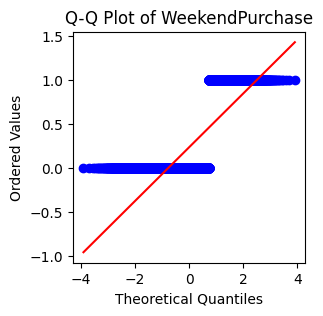

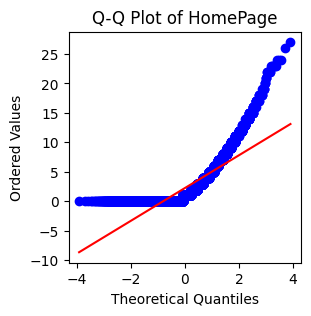

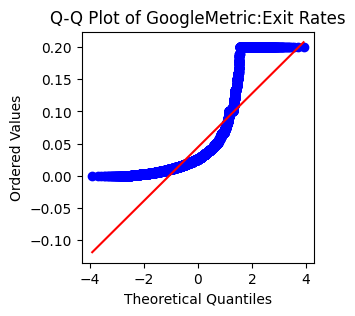

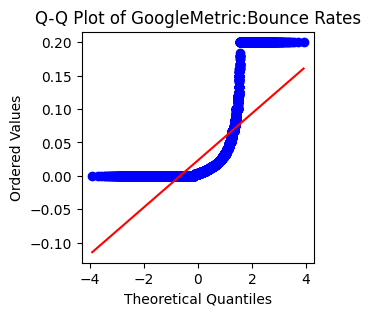

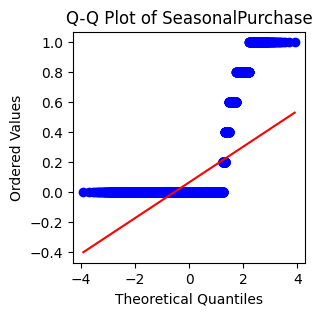

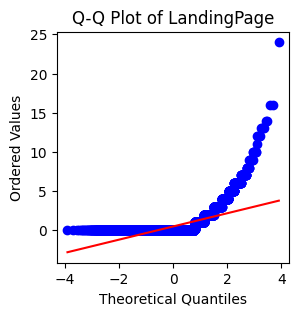

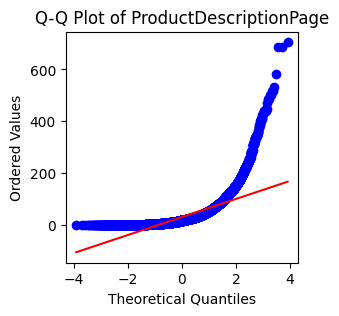

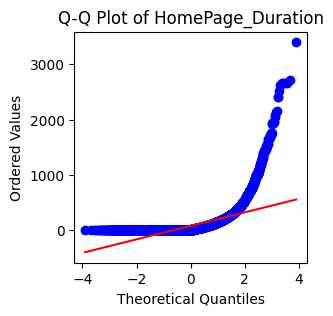

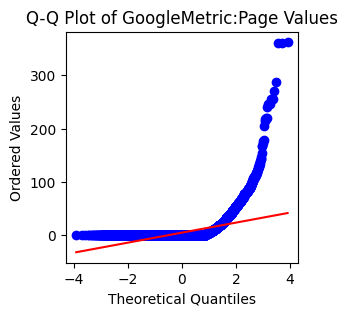

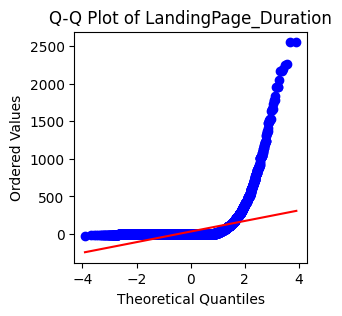

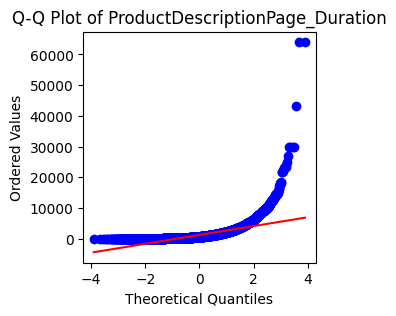

In [21]:
# Function to create Q-Q plot
def plot_qq(data, title):
    fig, ax = plt.subplots(figsize=(3, 3))
    stats.probplot(data, dist="norm", plot=ax)
    ax.get_lines()[1].set_markersize(2)  # Adjust marker size for better visibility
    ax.set_title(title)
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Ordered Values')
    #plt.grid(True)
    plt.show()

# Create Q-Q plots for each numerical variable
for var in numerical_variables:
    plot_qq(data[var], f'Q-Q Plot of {var}')


#### 1) after observing both the histograms and q-q plots it is clear that data is not normally distrubuted.
#### 2) So Non-parametric methods are more suitable for data that do not follow a normal distribution. 

#### These methods include:
#### a) Interquartile Range (IQR) Method: Detect outliers based on the interquartile range.
#### b) Median Absolute Deviation (MAD): Detect outliers based on the median absolute deviation from the median.

In [22]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calculating IQR for each numerical variable
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Determining lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers for each numerical variable
outliers = (data[numerical_columns] < lower_bound) | (data[numerical_columns] > upper_bound)

# Counting number of outliers for each numerical variable
outlier_counts = outliers.sum()

# Displaying the outlier counts
print("Number of outliers for each numerical variable:")
print(outlier_counts)

Number of outliers for each numerical variable:
HomePage                           1191
HomePage_Duration                  1391
LandingPage                        3206
LandingPage_Duration               2927
ProductDescriptionPage             1235
ProductDescriptionPage_Duration    1167
GoogleMetric:Bounce Rates          1872
GoogleMetric:Exit Rates            1416
GoogleMetric:Page Values           2944
SeasonalPurchase                   1547
WeekendPurchase                    3421
dtype: int64


### now we can use...
### Capping/Flooring: We can cap (set a maximum threshold) or floor (set a minimum threshold) the outliers to a certain value to prevent them from disproportionately affecting the analysis. This approach retains the data but modifies extreme values.

In [23]:
# Apply capping and flooring to numerical variables using clip method
data[numerical_columns] = data[numerical_columns].clip(lower=lower_bound, upper=upper_bound, axis=1)

## Feature Scaling

In [24]:
data.head(12)

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.044118,0.103000,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.044118,0.103000,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,0.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.044118,0.103000,0.0,0.0,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.044118,0.103000,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,0.0,False
5,0.0,0.0,0.0,0.0,3.0,738.000000,0.000000,0.022222,0.0,0.0,...,4.0,1.0,2.0,Returning_Visitor,Female,Required,Not Specified,Other,0.0,False
6,0.0,0.0,0.0,0.0,3.0,395.000000,0.000000,0.066667,0.0,0.0,...,1.0,3.0,3.0,Returning_Visitor,Female,ALL,Diploma,Married,0.0,False
7,0.0,0.0,0.0,0.0,7.0,280.500000,0.000000,0.028571,0.0,0.0,...,1.0,1.0,3.0,Returning_Visitor,Female,Deny,Diploma,Other,0.0,False
8,0.0,0.0,0.0,0.0,6.0,98.000000,0.000000,0.066667,0.0,0.0,...,5.0,1.0,3.0,Returning_Visitor,Not Specified,Deny,Graduate,Single,0.0,False
9,0.0,0.0,0.0,0.0,2.0,68.000000,0.000000,0.100000,0.0,0.0,...,2.0,3.0,3.0,Returning_Visitor,Male,Required,Diploma,Single,0.0,False


### Since the problem statement involves classification and the features we are dealing may not be normally distributed based on the previous observations, using normalization for feature scaling would be a wise choice. This will ensure that all features are on a similar scale and can help improve the performance of classification algorithms

### Min-Max Scaling

In [25]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Reshape the numerical columns into a 2D array with the same number of elements as the original DataFrame columns
reshaped_data = data[numerical_columns].values.reshape(-1, len(numerical_columns))

# Scale the reshaped data using the MinMaxScaler
scaled_data = scaler.fit_transform(reshaped_data)

# Create a new DataFrame with the scaled data and assign it to the original DataFrame's numerical columns
data[numerical_columns] = scaled_data

In [26]:
data.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.000000,0.0,0.0,0.0,0.012195,0.010614,1.000000,1.000000,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.000000,0.0,0.0,0.0,0.024390,0.011406,1.000000,1.000000,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.000000,0.0,0.0,0.0,0.121951,0.197051,0.453333,0.485437,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,0.0,False
3,0.000000,0.0,0.0,0.0,0.012195,0.010614,1.000000,1.000000,0.0,0.0,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,0.133333,0.0,0.0,0.0,0.000000,0.010614,1.000000,1.000000,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,0.0,False


## Correlation Analysis

### Performing correlation analysis will help one identify which features are most strongly correlated with the target variable, which can guide the feature selection process. Once we have a clearer understanding of the relationships between variables, one can proceed with feature engineering to create new features or transform existing ones to improve model performance.

In [27]:
# Calculate correlation coefficients between numerical features and the target variable
numerical_correlation = data[numerical_columns].join(data['Made_Purchase']).corr()

# Calculate correlation coefficients among numerical features
numerical_features_correlation = data[numerical_columns].corr()


In [28]:
print(numerical_features_correlation)

                                 HomePage  HomePage_Duration  LandingPage  \
HomePage                         1.000000           0.821483          NaN   
HomePage_Duration                0.821483           1.000000          NaN   
LandingPage                           NaN                NaN          NaN   
LandingPage_Duration                  NaN                NaN          NaN   
ProductDescriptionPage           0.438795           0.372047          NaN   
ProductDescriptionPage_Duration  0.396214           0.366585          NaN   
GoogleMetric:Bounce Rates       -0.247382          -0.217273          NaN   
GoogleMetric:Exit Rates         -0.399845          -0.365019          NaN   
GoogleMetric:Page Values              NaN                NaN          NaN   
SeasonalPurchase                      NaN                NaN          NaN   
WeekendPurchase                       NaN                NaN          NaN   

                                 LandingPage_Duration  ProductDescriptionPa

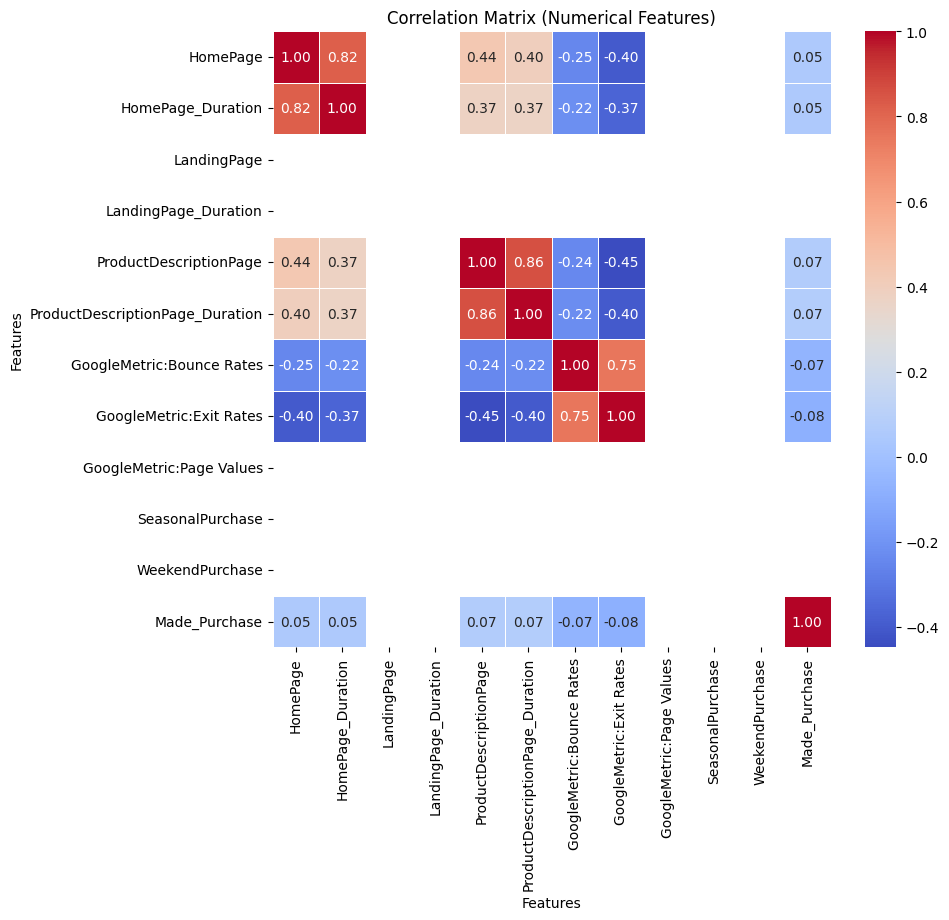

In [29]:
plt.figure(figsize=(9, 8))

# Plot the heatmap
sns.heatmap(numerical_correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Set the title and labels
plt.title('Correlation Matrix (Numerical Features)')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()

# Feature Engineering

### One-Hot Encoding:-
---
#### Since most the categorical varibales we are dealing with are non-ordinal, one-hot encoding is best choice for Converting categorical variables into numerical representations that can be used by machine learning algorithms.

In [30]:
categorical_columns = ['Month_SeasonalPurchase', 'OS', 'SearchEngine', 'Zone', 'Type of Traffic',
                        'CustomerType', 'Gender', 'Cookies Setting', 'Education', 'Marital Status']

# Apply one-hot encoding to categorical columns
one_hot_encoded = pd.get_dummies(data[categorical_columns], drop_first=True)

# Concatenate one-hot encoded columns with the original dataset
data_encoded = pd.concat([data, one_hot_encoded], axis=1)

# Drop the original categorical columns as they are no longer needed
data_encoded = data_encoded.drop(categorical_columns, axis=1)

data_encoded.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,CustomerType_Returning_Visitor,Gender_Male,Gender_Not Specified,Cookies Setting_Deny,Cookies Setting_Required,Education_Graduate,Education_Not Specified,Education_Others,Marital Status_Other,Marital Status_Single
0,0.000000,0.0,0.0,0.0,0.012195,0.010614,1.000000,1.000000,0.0,0.0,...,1,0,1,1,0,0,1,0,1,0
1,0.000000,0.0,0.0,0.0,0.024390,0.011406,1.000000,1.000000,0.0,0.0,...,1,0,0,1,0,0,0,1,0,0
2,0.000000,0.0,0.0,0.0,0.121951,0.197051,0.453333,0.485437,0.0,0.0,...,1,0,0,0,0,0,0,1,0,0
3,0.000000,0.0,0.0,0.0,0.012195,0.010614,1.000000,1.000000,0.0,0.0,...,1,1,0,0,0,0,0,0,0,1
4,0.133333,0.0,0.0,0.0,0.000000,0.010614,1.000000,1.000000,0.0,0.0,...,1,1,0,1,0,0,0,0,1,0


#### The above code will create new binary columns for each category in the categorical variables, dropping the first category to avoid multicollinearity. 

# Stage-2 ==> ML model creation

# Class Imbalance handling

#### before proceeding further it is always important to check for class imbalance

In [31]:
# Calculate class distribution
class_distribution = data_encoded['Made_Purchase'].value_counts()

# Display the class distribution
print("Class Distribution:")
print(class_distribution)


Class Distribution:
False    9065
True     5666
Name: Made_Purchase, dtype: int64


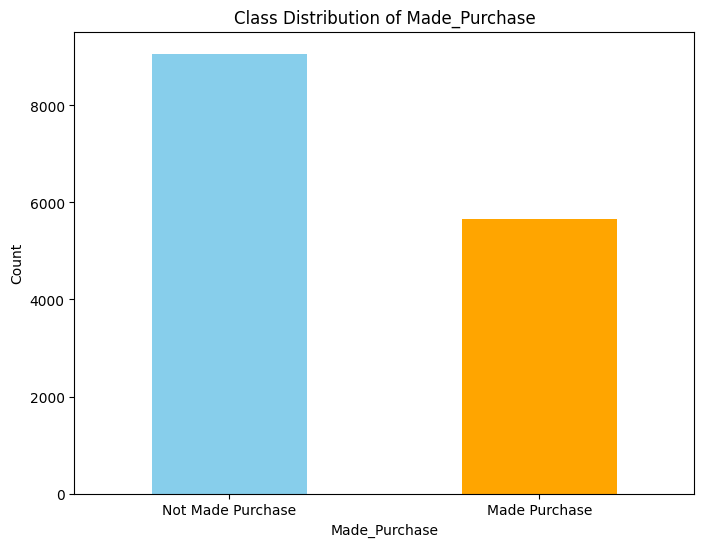

In [32]:
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution of Made_Purchase')
plt.xlabel('Made_Purchase')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Made Purchase', 'Made Purchase'], rotation=0)
plt.show()

#### after looking at results it is clear that there is mild class imbalance.
---
#### To address class imbalance, we have several options:

#### 1) Resampling Techniques: We can either oversample the minority class (True) or undersample the majority class (False) to balance the class distribution.
#### 2) Synthetic Data Generation: We can use techniques like Synthetic Minority Over-sampling Technique (SMOTE) to generate synthetic samples for the minority class.
#### 3) Algorithmic Approaches: Some algorithms, like tree-based models, are inherently robust to class imbalance. We can choose algorithms that handle class imbalance well.
#### 4) Evaluation Metrics: We can use evaluation metrics like F1 score, precision, recall, or area under the ROC curve (AUC-ROC) that are suitable for imbalanced datasets.

---
#### seeing the context and the problem we are dealing we can choose Resampling Techniques, Algorithmic Approaches & Evaluation Metrics to handle the class imbalance

In [33]:
# Splitting data_encoded into training and testing sets (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(data_encoded.drop('Made_Purchase', axis=1),
                                                    data_encoded['Made_Purchase'],
                                                    test_size=0.2,
                                                    random_state=27)

# Check the shape of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (11784, 77) (11784,)
Testing set shape: (2947, 77) (2947,)


#### as we have large dataset and want to reduce computation time, it is better to choose undersampling 

In [34]:


# Initialize NearMiss-2
nearmiss = NearMiss(version=2)

# Perform undersampling on the entire dataset
X_resampled, y_resampled = nearmiss.fit_resample(X_train, y_train)

# Check the class distribution after undersampling
print("Class Distribution after Undersampling:")
print(y_resampled.value_counts())

Class Distribution after Undersampling:
False    4561
True     4561
Name: Made_Purchase, dtype: int64


# splitting the data & model building, training & evaluation

## Logistic Regression

In [35]:
# Splitting the resampled data
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=27)

# Instantiate the model
logit_model_resampled = LogisticRegression()

# Train the model
logit_model_resampled.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_resampled = logit_model_resampled.predict(X_test_resampled)

# Evaluate the model
accuracy_resampled = accuracy_score(y_test_resampled, y_pred_resampled)
precision_resampled = precision_score(y_test_resampled, y_pred_resampled)
recall_resampled = recall_score(y_test_resampled, y_pred_resampled)
f1_resampled = f1_score(y_test_resampled, y_pred_resampled)

# Print the evaluation metrics
print("Accuracy:", accuracy_resampled)
print("Precision:", precision_resampled)
print("Recall:", recall_resampled)
print("F1-score:", f1_resampled)

Accuracy: 0.6273972602739726
Precision: 0.6377142857142857
Recall: 0.6058631921824105
F1-score: 0.621380846325167


## Random Fores Classifier

In [36]:
# Initialize the Random Forest Classifier

random_forest = RandomForestClassifier(min_samples_leaf= 90, n_estimators=20,  max_depth=30, random_state=42)

# Train the model
random_forest.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_rf = random_forest.predict(X_test_resampled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test_resampled, y_pred_rf)
precision_rf = precision_score(y_test_resampled, y_pred_rf)
recall_rf = recall_score(y_test_resampled, y_pred_rf)
f1_rf = f1_score(y_test_resampled, y_pred_rf)

print("Random Forest Classifier Metrics:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1-score: {f1_rf}")

Random Forest Classifier Metrics:
Accuracy: 0.6054794520547945
Precision: 0.6534351145038167
Recall: 0.46471226927252984
F1-score: 0.5431472081218274


## Gradient Boosting Classifier

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Train the model
gradient_boosting.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_gb = gradient_boosting.predict(X_test_resampled)

# Evaluate the model
accuracy_gb = accuracy_score(y_test_resampled, y_pred_gb)
precision_gb = precision_score(y_test_resampled, y_pred_gb)
recall_gb = recall_score(y_test_resampled, y_pred_gb)
f1_gb = f1_score(y_test_resampled, y_pred_gb)

print("Gradient Boosting Classifier Metrics:")
print(f"Accuracy: {accuracy_gb}")
print(f"Precision: {precision_gb}")
print(f"Recall: {recall_gb}")
print(f"F1-score: {f1_gb}")

Gradient Boosting Classifier Metrics:
Accuracy: 0.6317808219178083
Precision: 0.6776034236804565
Recall: 0.5157437567861021
F1-score: 0.5856966707768188


## Support Vector Machine

In [38]:
from sklearn.svm import SVC

# Initialize the Support Vector Machine Classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the model
svm_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_svm = svm_classifier.predict(X_test_resampled)

# Evaluate the model
accuracy_svm = accuracy_score(y_test_resampled, y_pred_svm)
precision_svm = precision_score(y_test_resampled, y_pred_svm)
recall_svm = recall_score(y_test_resampled, y_pred_svm)
f1_svm = f1_score(y_test_resampled, y_pred_svm)

print("Support Vector Machine (SVM) Classifier Metrics:")
print(f"Accuracy: {accuracy_svm}")
print(f"Precision: {precision_svm}")
print(f"Recall: {recall_svm}")
print(f"F1-score: {f1_svm}")


Support Vector Machine (SVM) Classifier Metrics:
Accuracy: 0.6312328767123287
Precision: 0.6585677749360613
Recall: 0.5591748099891423
F1-score: 0.6048150322959482


# final results

In [39]:
metrics_dict = {
    "Classifier": [
        "Logistic Regression",
        "Random Forest",
        "Gradient Boosting",
        "Support Vector Machine (SVM)"
    ],
    "Accuracy": [
        accuracy_resampled,
        accuracy_rf,
        accuracy_gb,
        accuracy_svm
    ],
    "Precision": [
        precision_resampled,
        precision_rf,
        precision_gb,
        precision_svm
    ],
    "Recall": [
        recall_resampled,
        recall_rf,
        recall_gb,
        recall_svm
    ],
    "F1-score": [
        f1_resampled,
        f1_rf,
        f1_gb,
        f1_svm
    ]
}

# Create a DataFrame from the dictionary
metrics_df = pd.DataFrame(metrics_dict)

# Print the DataFrame as a table
print(metrics_df)

                     Classifier  Accuracy  Precision    Recall  F1-score
0           Logistic Regression  0.627397   0.637714  0.605863  0.621381
1                 Random Forest  0.605479   0.653435  0.464712  0.543147
2             Gradient Boosting  0.631781   0.677603  0.515744  0.585697
3  Support Vector Machine (SVM)  0.631233   0.658568  0.559175  0.604815
